In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon, gamma
import seaborn as sns

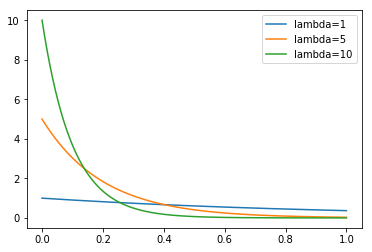

In [2]:
x = np.linspace(0, 1, num=1000)
lambda_ = [1, 5, 10]
for l in lambda_:
    y = expon.pdf(x, scale=1/l)
    plt.plot(x, y, label='lambda={}'.format(str(l)))
plt.legend();

#### Problem 1.7
Let X $\sim$ Exp($\lambda$). Show that the memoryless property holds: for all s, t >= 0, <br>
P(X > t + s | X > t) = P(X > s).
#### solution:

As f(x) = $\lambda e^{-\lambda x}$, we can calculate from it cumulative distribution function, F(x) = 1 - $e^{-\lambda x}$.

P(X > t + s | X > t) = $\frac{P(X > t + s, X > t)}{P(X > t)}$ = $\frac{P(X > t + s)}{P(X > t)}$ = $\frac{1 - F(t + s)}{1 - F(t)}$ = $\frac{e^{-\lambda (t + s)}}{e^{-\lambda t}}$ = $e^{-\lambda s}$ = 1 - F(s) = P(X > s)

#### Problem 1.11
Let X $\sim$ Exp($\lambda$) and Y $\sim$ Exp($\mu$) be independent. Show that <br>
a) min(X, Y) $\sim$ Exp($\lambda + \mu$), <br>
b) P(X < Y|min(X, Y)) = $\frac{\lambda}{\lambda + \mu}$

#### solution:
a) P(min(X, Y) <= t) = 1 - P(min(X, Y) > t) = 1 - P(X > t)P(Y > t) = 1 - (1 - $F_{X}(t)$)(1 - $F_{Y}(t)$) = 1 - $e^{\lambda t}e^{\mu t}$ = 1 - $e^{(\lambda + \mu)t}$

#### Problem 1.17
Suppose Y $\sim$ Gamma(n, $\lambda$). Show that for all x >= 0

P(Y <= x) = 1 - $\sum_{k=0}^{n-1}\frac{e^{-\lambda x}(\lambda x)^{k}}{k!}$
#### "solution":
This problem comes from "poisson process" section. <br>

Let $N_{t}$ denote a Poisson process with rate $\lambda$ > 0 (number of arrivals until t) <br>
By definition, E[$N_{t}$] = $\lambda t$

Probability of at least n arrivals until t: <br>
$P(N_{t} >= n)$ = 1 - $\sum_{k=0}^{n-1}P(N_{t} = k)$ = $1 - \sum_{k=0}^{n-1}\frac{e^{-\lambda t}(\lambda t)^{k}}{k!}$. <br>The last equality comes from Poisson process assumption

So cumulative Gamma distribution has an interesting interpretation.
Cdf of Gamma(n, $\lambda$), $F_{G}(x)$  models the probability of observing at least n arrivals until time x. 

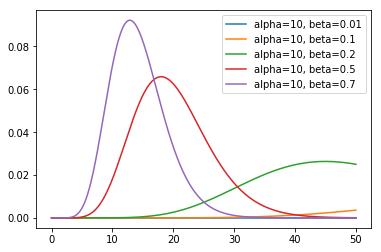

In [3]:
x = np.linspace(0, 50, num=1000)
n = 10
lambda_ = [0.01, 0.1, 0.2, 0.5, 0.7]
for l in lambda_:
    y = gamma.pdf(x, a=n, scale=1/l)
    plt.plot(x, y, label='alpha=10, beta={}'.format(str(l)))
plt.legend();

In [5]:
"""
For example for alpha=10 and beta=0.2, we can calculate for any t
E[N_t] = t * beta, for t = 50, E[N_50] = 10. Mean arrivals until 50
is equal to 10.
""";

cdf for t=50 : 0.5420702855281478


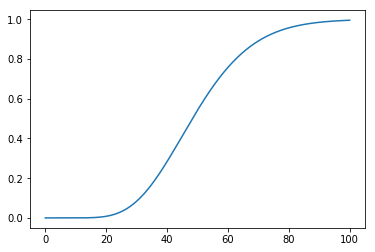

In [6]:
x = np.linspace(0, 100, num=1000)
y = gamma.cdf(x, a=10, scale=1/0.2)
print('cdf for t=50 : {}'.format(gamma.cdf(50, a=10, scale=1/0.2)))
plt.plot(x, y);

"""
Since beta is low, the probability of seeing at least 10 arrivals as
a function of waiting time t, need to be quite big.
""";

Intutition behind the mean of Gamma distribution: <br>
We want to see at least $\alpha$ arrivals and the rate of seeing them
is $\beta$. <br> So in any interval $\Delta$, on average we see:
$\Delta \beta$ arrivals.

To see $\alpha$ arrivals we need on average wait t$\beta$ = $\alpha$. <br> or t = $\frac{\alpha}{\beta}$

##### Theorem 1.13.2
For an irreducible, aperiodic Markov chain with transition matrix P, if the limiting distribution $\pi$ exists, then it is uniquely determined by the solution of <br>
$\pi$ = $\pi$P

with $\pi_{j} >= 0$ and $\sum_{j}\pi_{j}$ = 1. Conversely, if there exists a positive row vector $\pi$ satisfying the above and summing up to 1, then $\pi$ is the limiting distribution of the Markov chain. Moreover, in that case, $\pi_{j} > 0$ for all j and all states are positive recurrent

##### global balance equations

$\pi_{i} = \pi_{i}\sum_{j}p_{ij} = \sum_{j}\pi_{i}p_{ij}$ (simply by the fact that $\sum_{j}p_{ij}$ = 1) <br>
$\pi_{i} = \sum_{j}\pi_{j}p_{ji}$ (from the Theorem 1.13.2)

$\sum_{j}\pi_{i}p_{ij} = \sum_{j}\pi_{j}p_{ji}$ <br><br>
"probability flux out of i" = "probability flux into i"

##### Theorem 1.13.2 (for continuous index)
If X is a recurrent and irreducible Markov jump proces, then regardless of i, <br>
$\lim_{t -> \infty} P(X_{t} = j|X_{0} = i) = \pi_{j}$ <br>
for some number $\pi_{j} >= 0$. Moreover, $\pi$ = $(\pi_{1}, \pi_{2}, ...)$ is the solution to <br>

$\sum_{j \neq i}\pi_{i}q_{ij} = \sum_{j \neq i}\pi_{j}q_{ji}$, for all i = 1, 2, ..m <br>
with $\sum_{j}\pi_{j}=1$, if such a solution exists, in which case all states are positive recurrent. If such a solution does not exist, all $\pi_{j}$ are 0.
<br><br>
transition rate $q_{ij}$ is defined as <br>
$q_{ij} = \lim_{t -> 0}\frac{P_{t}(i, j)}{t}$